## Execute the following cell to login

In [13]:
#!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20201.ai4eng/master/init.py
import init; init.init(force_download=False); init.get_weblink()
init.endpoint

endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


'https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc'

In [158]:
from local.lib.rlxmoocapi import submit, session
student = session.Session(init.endpoint).login( course_id=init.course_id, 
                                                session_id="UDEA", 
                                                lab_id="L04.02" )
init.get_weblink()

username: kevin.martinez@udea.edu.co
password: ········
endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


## Understand the ASHRAE Energy Prediction in Kaggle

Follow this link: https://www.kaggle.com/c/ashrae-energy-prediction, register for the task and download the data.

In particular, understand:

- The machine learning task they define (what they want to predict)
- How the data is provided
- The structure and relation between the files `train.csv`, `weather_train.csv` and `building_metadata.csv`

In [15]:
import pandas as pd

In [16]:
train = pd.read_csv('../ashrae_energy_prediction/train.csv')
train

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [17]:
train.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype='object')

In [18]:
weather_train = pd.read_csv('../ashrae_energy_prediction/weather_train.csv')
weather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [19]:
weather_train.columns

Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

In [20]:
building_metadata = pd.read_csv('../ashrae_energy_prediction/building_metadata.csv')
building_metadata

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [21]:
building_metadata.columns

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count'],
      dtype='object')

## Task 1: Build a training dataset

Execute the cell below and you will be given a **building_id** and a **date**. You will have to:

1. Build a table containing one row per hour and the following columns **only for that building_id and date**: 
       'meter_reading', 'site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'square_feet', 'year_built'
   Note that you will have to gather this information from the different csv sources.
   
1. use only measures with `meter`=0
1. Fill any missing values with zero.
1. Extract the column of the target variable and sum all values.
1. Sum all the values of the rest of the columns.
1. Fill in those values in the variables below.
1. Submit your answer.

Observe that, with this dataset, we could train a model to make predictions of the target variable, taking the rest of the variables as input.

For instance, for building number 900, on 2016-02-01:
- there are 24 records
- the sum of all values of the target variable is 4941 (cropping decimals)
- the sum of all values of the rest of the variables is 2705422 (cropping decimals)

In [159]:
from IPython.display import Image
from local.lib import labutils
import numpy as np
bid, date = labutils.biddate_for_student(student.user_id)
print ("your building_id", bid)
print ("your date       ", date)

your building_id 901
your date        2016-02-15


In [107]:
# For testing purposes
bid = 900
date = '2016-02-01'
print ("your building_id", bid)
print ("your date       ", date)

your building_id 900
your date        2016-02-01


1. Filter by given building id and date

In [138]:
df1 = train[(train.building_id == bid)]
df1

,building_id,meter,timestamp,meter_reading
1134,901,0,2016-01-01 00:00:00,0.0000
1135,901,1,2016-01-01 00:00:00,0.0000
1136,901,2,2016-01-01 00:00:00,0.0000
3433,901,0,2016-01-01 01:00:00,158.0000
3434,901,1,2016-01-01 01:00:00,46.3873
...,...,...,...,...
20212555,901,1,2016-12-31 22:00:00,43.5034
20212556,901,2,2016-12-31 22:00:00,112.8500
20214919,901,0,2016-12-31 23:00:00,142.0000
20214920,901,1,2016-12-31 23:00:00,42.1319


In [139]:
df1.index = pd.to_datetime(df1.timestamp)
del(df1['timestamp'])
df1

,building_id,meter,meter_reading
timestamp,,,
2016-01-01 00:00:00,901,0,0.0000
2016-01-01 00:00:00,901,1,0.0000
2016-01-01 00:00:00,901,2,0.0000
2016-01-01 01:00:00,901,0,158.0000
2016-01-01 01:00:00,901,1,46.3873
...,...,...,...
2016-12-31 22:00:00,901,1,43.5034
2016-12-31 22:00:00,901,2,112.8500
2016-12-31 23:00:00,901,0,142.0000


In [140]:
df1 = df1.loc[date]
df1

,building_id,meter,meter_reading
timestamp,,,
2016-02-15 00:00:00,901,0,156.0000
2016-02-15 00:00:00,901,1,33.9376
2016-02-15 00:00:00,901,2,207.4000
2016-02-15 01:00:00,901,0,155.0000
2016-02-15 01:00:00,901,1,34.5355
...,...,...,...
2016-02-15 22:00:00,901,1,36.5401
2016-02-15 22:00:00,901,2,210.4500
2016-02-15 23:00:00,901,0,158.0000


2. Only meter equal 0

In [141]:
df1 = df1[df1.meter == 0]
df1

,building_id,meter,meter_reading
timestamp,,,
2016-02-15 00:00:00,901,0,156.0
2016-02-15 01:00:00,901,0,155.0
2016-02-15 02:00:00,901,0,154.0
2016-02-15 03:00:00,901,0,152.0
2016-02-15 04:00:00,901,0,153.0
2016-02-15 05:00:00,901,0,154.0
2016-02-15 06:00:00,901,0,155.0
2016-02-15 07:00:00,901,0,163.0
2016-02-15 08:00:00,901,0,161.0


In [142]:
del(df1['building_id'])
del(df1['meter'])
df1

,meter_reading
timestamp,
2016-02-15 00:00:00,156.0
2016-02-15 01:00:00,155.0
2016-02-15 02:00:00,154.0
2016-02-15 03:00:00,152.0
2016-02-15 04:00:00,153.0
2016-02-15 05:00:00,154.0
2016-02-15 06:00:00,155.0
2016-02-15 07:00:00,163.0
2016-02-15 08:00:00,161.0


In [143]:
print(df1.shape)

(24, 1)


In [144]:
df2 = building_metadata[building_metadata.building_id == bid]
df2

,site_id,building_id,primary_use,square_feet,year_built,floor_count
901,9,901,Education,107730,NaN,NaN


In [145]:
del(df2['site_id'])
del(df2['building_id'])
del(df2['primary_use'])
del(df2['floor_count'])
df2

,square_feet,year_built
901,107730,NaN


In [146]:
df3 = weather_train.copy(deep = True)
df3

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [147]:
df3.index = pd.to_datetime(df3.timestamp)
del(df3['timestamp'])
df3 = df3.loc[date]
df3 = df3[df3.site_id == 9]
df3

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-02-15 00:00:00,9,21.1,0.0,11.7,0.0,1010.1,200.0,1.5
2016-02-15 01:00:00,9,19.4,0.0,11.7,0.0,1010.3,0.0,0.0
2016-02-15 02:00:00,9,19.4,0.0,11.7,0.0,1010.4,160.0,3.6
2016-02-15 03:00:00,9,18.3,0.0,12.8,0.0,1010.8,NaN,2.1
2016-02-15 04:00:00,9,17.2,0.0,13.3,0.0,1010.7,NaN,3.1
2016-02-15 05:00:00,9,16.1,0.0,12.8,0.0,1011.1,NaN,2.1
2016-02-15 06:00:00,9,15.0,0.0,12.8,0.0,1010.8,170.0,1.5
2016-02-15 07:00:00,9,15.0,0.0,12.8,0.0,1010.9,0.0,0.0
2016-02-15 08:00:00,9,15.0,NaN,13.3,0.0,1010.1,170.0,1.5


In [148]:
print(df3.shape)

(24, 8)


In [149]:
df_join = df1.join(df3)
df_join

,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,,
2016-02-15 00:00:00,156.0,9,21.1,0.0,11.7,0.0,1010.1,200.0,1.5
2016-02-15 01:00:00,155.0,9,19.4,0.0,11.7,0.0,1010.3,0.0,0.0
2016-02-15 02:00:00,154.0,9,19.4,0.0,11.7,0.0,1010.4,160.0,3.6
2016-02-15 03:00:00,152.0,9,18.3,0.0,12.8,0.0,1010.8,NaN,2.1
2016-02-15 04:00:00,153.0,9,17.2,0.0,13.3,0.0,1010.7,NaN,3.1
2016-02-15 05:00:00,154.0,9,16.1,0.0,12.8,0.0,1011.1,NaN,2.1
2016-02-15 06:00:00,155.0,9,15.0,0.0,12.8,0.0,1010.8,170.0,1.5
2016-02-15 07:00:00,163.0,9,15.0,0.0,12.8,0.0,1010.9,0.0,0.0
2016-02-15 08:00:00,161.0,9,15.0,NaN,13.3,0.0,1010.1,170.0,1.5


In [150]:
df_join.shape

(24, 9)

In [151]:
df2

,square_feet,year_built
901,107730,NaN


In [152]:
df_join['square_feet'] = df2.values[0][0]
df_join['year_built'] = df2.values[0][1]
df_join

,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,square_feet,year_built
timestamp,,,,,,,,,,,
2016-02-15 00:00:00,156.0,9,21.1,0.0,11.7,0.0,1010.1,200.0,1.5,107730.0,NaN
2016-02-15 01:00:00,155.0,9,19.4,0.0,11.7,0.0,1010.3,0.0,0.0,107730.0,NaN
2016-02-15 02:00:00,154.0,9,19.4,0.0,11.7,0.0,1010.4,160.0,3.6,107730.0,NaN
2016-02-15 03:00:00,152.0,9,18.3,0.0,12.8,0.0,1010.8,NaN,2.1,107730.0,NaN
2016-02-15 04:00:00,153.0,9,17.2,0.0,13.3,0.0,1010.7,NaN,3.1,107730.0,NaN
2016-02-15 05:00:00,154.0,9,16.1,0.0,12.8,0.0,1011.1,NaN,2.1,107730.0,NaN
2016-02-15 06:00:00,155.0,9,15.0,0.0,12.8,0.0,1010.8,170.0,1.5,107730.0,NaN
2016-02-15 07:00:00,163.0,9,15.0,0.0,12.8,0.0,1010.9,0.0,0.0,107730.0,NaN
2016-02-15 08:00:00,161.0,9,15.0,NaN,13.3,0.0,1010.1,170.0,1.5,107730.0,NaN


3. Fill any missing values with zero.

In [153]:
df_join.fillna(value = 0, inplace = True)
df_join

,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,square_feet,year_built
timestamp,,,,,,,,,,,
2016-02-15 00:00:00,156.0,9,21.1,0.0,11.7,0.0,1010.1,200.0,1.5,107730.0,0.0
2016-02-15 01:00:00,155.0,9,19.4,0.0,11.7,0.0,1010.3,0.0,0.0,107730.0,0.0
2016-02-15 02:00:00,154.0,9,19.4,0.0,11.7,0.0,1010.4,160.0,3.6,107730.0,0.0
2016-02-15 03:00:00,152.0,9,18.3,0.0,12.8,0.0,1010.8,0.0,2.1,107730.0,0.0
2016-02-15 04:00:00,153.0,9,17.2,0.0,13.3,0.0,1010.7,0.0,3.1,107730.0,0.0
2016-02-15 05:00:00,154.0,9,16.1,0.0,12.8,0.0,1011.1,0.0,2.1,107730.0,0.0
2016-02-15 06:00:00,155.0,9,15.0,0.0,12.8,0.0,1010.8,170.0,1.5,107730.0,0.0
2016-02-15 07:00:00,163.0,9,15.0,0.0,12.8,0.0,1010.9,0.0,0.0,107730.0,0.0
2016-02-15 08:00:00,161.0,9,15.0,0.0,13.3,0.0,1010.1,170.0,1.5,107730.0,0.0


In [154]:
sum_Y = int(df_join['meter_reading'].sum())
sum_Y

3951

In [155]:
sum_X = int(np.sum(df_join.sum().tolist()) - sum_Y)
sum_X

2614095

#### provide your answer here, drop the decimals

In [156]:
# target variable sum
sumY = sum_Y

# input variables sum
sumX = sum_X

sumX, sumY

(2614095, 3951)

**submit your answer**

In [160]:
student.submit_task(globals(), task_id="task_01");

## Task 2. Time series missing data fix

Observe how we can fill in missing data in a time series, by simply repeating the last seen value in the missing places.

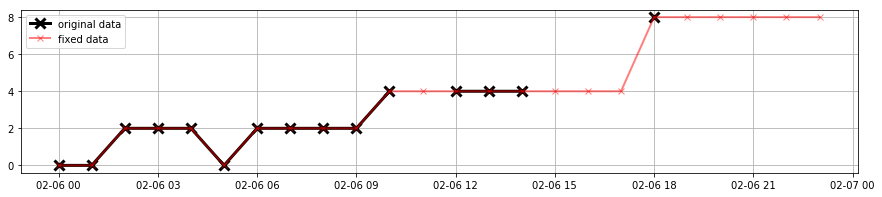

In [161]:
Image("local/imgs/timeseries-ffill.png")

Using the weather data from the ASHRAE Kaggle competition that you must have downloaded in the previous task you will have to:

1. Extract the time series for the variable `cloud_coverage` for **site_id=3** and for the **date assigned to you** (execute the cell below). This time series will have 24 values (including missing values).
1. Fill in the missing data by repeating the last seen value as in the example above
1. Report the time series as a Pyton list in the variable `fixed_ts` below

Again, use any tool of your choice to generate your result

In [163]:
from local.lib import labutils
_, date = labutils.biddate_for_student(student.user_id)
print ("your date       ", date)

your date        2016-02-15


In [169]:
df4 = weather_train.copy(deep = True)
df4.index = pd.to_datetime(df4.timestamp)
del(df4['timestamp'])
df4

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 01:00:00,0,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2016-01-01 02:00:00,0,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
2016-01-01 03:00:00,0,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
2016-01-01 04:00:00,0,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,15,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
2016-12-31 20:00:00,15,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
2016-12-31 21:00:00,15,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1


In [170]:
df4 = df4[(df4.site_id == 3)][date]
df4

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-02-15 00:00:00,3,-4.4,6.0,-17.8,0.0,1034.1,150.0,2.1
2016-02-15 01:00:00,3,-5.6,NaN,-15.0,0.0,1033.8,140.0,5.7
2016-02-15 02:00:00,3,-5.6,NaN,-15.0,0.0,1033.5,120.0,4.6
2016-02-15 03:00:00,3,-5.0,8.0,-14.4,0.0,1033.6,130.0,4.6
2016-02-15 04:00:00,3,-5.0,NaN,-14.4,-1.0,NaN,150.0,3.6
2016-02-15 05:00:00,3,-6.1,NaN,-9.4,3.0,1033.3,160.0,4.6
2016-02-15 06:00:00,3,-6.7,8.0,-8.3,10.0,1033.4,160.0,4.1
2016-02-15 07:00:00,3,-6.1,NaN,-8.3,10.0,1033.3,150.0,3.6
2016-02-15 08:00:00,3,-6.1,NaN,-8.3,3.0,1032.8,140.0,4.1


In [171]:
print(df4.shape)

(24, 8)


In [173]:
cloud_cov = df4['cloud_coverage'].fillna(method = 'ffill')
cloud_cov

timestamp
2016-02-15 00:00:00    6.0
2016-02-15 01:00:00    6.0
2016-02-15 02:00:00    6.0
2016-02-15 03:00:00    8.0
2016-02-15 04:00:00    8.0
2016-02-15 05:00:00    8.0
2016-02-15 06:00:00    8.0
2016-02-15 07:00:00    8.0
2016-02-15 08:00:00    8.0
2016-02-15 09:00:00    8.0
2016-02-15 10:00:00    8.0
2016-02-15 11:00:00    8.0
2016-02-15 12:00:00    8.0
2016-02-15 13:00:00    8.0
2016-02-15 14:00:00    8.0
2016-02-15 15:00:00    8.0
2016-02-15 16:00:00    8.0
2016-02-15 17:00:00    8.0
2016-02-15 18:00:00    8.0
2016-02-15 19:00:00    8.0
2016-02-15 20:00:00    8.0
2016-02-15 21:00:00    8.0
2016-02-15 22:00:00    8.0
2016-02-15 23:00:00    8.0
Name: cloud_coverage, dtype: float64

#### fill in your fixed time series

In [175]:
# for instance
# fixed_ts = [6,6,6,4,4,5,6,7,7,7,6,6,6,5,4,3,2,2,1,1,1,2,3,4]
fixed_ts = cloud_cov.tolist()
fixed_ts

[6.0,
 6.0,
 6.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0]

**submit your answer**

In [176]:
student.submit_task(globals(), task_id="task_02");

## Task 3. Build a time series predictive dataset

You will now build a predictive dataset for a single time series. This dataset can later be used with predictive models. The machine learning task we will try to adress is the following:

> **Given three consecutive points of a time series, we want a model to predict the next one.**

Starting from a time series (a list of $n$ numbers) you will have to build a dataset such as in the following example



[44 45 42 38 47 45 46 44 47 52 53 48 46 42 42 34 30 27 24 24] 20


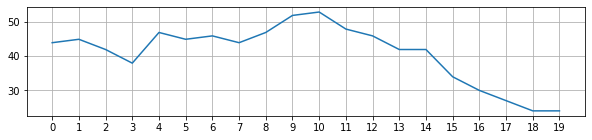

In [178]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ts = np.r_[44, 45, 42, 38, 47, 45, 46, 44, 47, 52, 53, 48, 46, 42, 42, 34, 30, 27, 24, 24]
plt.figure(figsize=(10,2))
plt.xticks(range(len(ts)), range(len(ts)))
plt.grid();
plt.plot(ts)
print (ts, len(ts))


dataset:

    [[[44, 45, 42], 38],
     [[45, 42, 38], 47],
     [[42, 38, 47], 45],
     [[38, 47, 45], 46],
     [[47, 45, 46], 44],
     [[45, 46, 44], 47],
     [[46, 44, 47], 52],
     [[44, 47, 52], 53],
     [[47, 52, 53], 48],
     [[52, 53, 48], 46],
     [[53, 48, 46], 42],
     [[48, 46, 42], 42],
     [[46, 42, 42], 34],
     [[42, 42, 34], 30],
     [[42, 34, 30], 27],
     [[34, 30, 27], 24]]

observe that each line in the dataset represents one input-output pair, like a sliding window over the time series. 

We created two components:

- a matrix $X$ of dimensions `(len(ts)-n-1,3)` gathering all inputs, in the case above with dimensions `(17,3)`
- a vector $y$ of dimension `(len(ts)-n-1)` gathering each corresponding expected output, in the case above with dimensions `(17)`.

In this task, you will have to:

1. Take the time series you created in the previous task, where you fixed the missing values.
1. Build $X$, $y$ such as above with $n=3$. If your time series has 24 data points, then X dimensions will be (20,3) and y dimensions will be (20)

Again, use any tool of your choice to generate your result.

In [190]:
print(fixed_ts)
print(len(fixed_ts))
length = len(fixed_ts)
n = 3

[6.0, 6.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
24


In [203]:
matrix = np.zeros((length - n - 1, n))
vector = np.zeros(length - n - 1)

In [204]:
for i in range(length - n - 1):
    matrix[i][0] = fixed_ts[i]
    matrix[i][1] = fixed_ts[i + 1]
    matrix[i][2] = fixed_ts[i + 2]
print(matrix, matrix.shape)

[[6. 6. 6.]
 [6. 6. 8.]
 [6. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]] (20, 3)


In [206]:
for i in range(n, length - n - 1):
    print(i)
    vector[i - n] = fixed_ts[i]
print(vector, len(vector))

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.] 20


#### fill in your answer


In [208]:
X = matrix
y = vector

**submit your answer**

In [209]:
student.submit_task(globals(), task_id="task_03");